In [ ]:
'''Q1. What are the key features of the wine quality data set? Discuss the importance of each feature in
predicting the quality of wine.'''
# Ans: The key features of the wine quality data set are:
# 1. Fixed acidity: most acids involved with wine or fixed or nonvolatile (do not evaporate readily)
# 2. Volatile acidity: the amount of acetic acid in wine, which at too high of levels can lead to an unpleasant, vinegar taste
# 3. Citric acid: found in small quantities, citric acid can add 'freshness' and flavor to wines
# 4. Residual sugar: the amount of sugar remaining after fermentation stops, 
# it's rare to find wines with less than 1 gram/liter and wines with greater than 45 grams/liter are considered sweet
# 5. Chlorides: the amount of salt in the wine
# 6. Free sulfur dioxide: the free form of SO2 exists in equilibrium between molecular SO2 (as a dissolved gas) and
# bisulfite ion; it prevents microbial growth and the oxidation of wine
# 7. Total sulfur dioxide: amount of free and bound forms of S02; in low concentrations, SO2 is mostly undetectable in wine,
# but at free SO2 concentrations over 50 ppm, SO2 becomes evident in the nose and taste of wine
# 8. Density: the density of water is close to that of water depending on the percent alcohol and sugar content
# 9. pH: describes how acidic or basic a wine is on a scale from 0 (very acidic) to 14 (very basic); most wines are between 3-4 on the pH scale
# 10. Sulphates: a wine additive which can contribute to sulfur dioxide gas (S02) levels, wich acts as an antimicrobial and antioxidant
# 11. Alcohol: the percent alcohol content of the wine
# 12. Quality (score between 0 and 10)


In [ ]:
'''Q2. How did you handle missing data in the wine quality data set during the feature engineering process?
Discuss the advantages and disadvantages of different imputation techniques.'''
# Ans: I handled the missing data in the wine quality data set during the feature engineering process by using the mean of the column
# to fill the missing values. The advantages of this technique are that it is simple and easy to implement and it gives a good result
# for the data set. The disadvantage of this technique is that it reduces the variance of the data set.


In [ ]:
'''Q3. What are the key factors that affect students' performance in exams? How would you go about
analyzing these factors using statistical techniques?'''
# Ans: The key factors that affect students' performance in exams are:
# The females are scoring high in the examinations
# When Standard Lunch is being taken into consideration, the students are scoring high in the examinations
# When visualize parental level of education with respect to the scores of the students, the students whose parents have a master's degree
# are scoring high in the examinations
# When the test preparation course is being taken into consideration, the students who have completed the test preparation course are scoring
# high in the examinations
# Grp A and Grp B are poor performers while Grp C is an average performer and Grp D and Grp E are good performers

In [ ]:
'''Q4. Describe the process of feature engineering in the context of the student performance data set. How
did you select and transform the variables for your model?
the process of feature engineering in the context of the student performance dataset involves several key steps:

Data exploration to understand the dataset's structure, variables, and relationships.
Variable selection by identifying relevant variables based on domain knowledge or feature selection techniques.
Handling missing values through imputation or removal strategies.
Categorical variable encoding to convert them into numeric representations suitable for machine learning algorithms.
Feature scaling to normalize numerical variables and prevent dominance during model training.
Feature creation by deriving new features from existing variables to capture additional information.
Feature transformation to meet modeling algorithm assumptions, such as achieving normality or handling skewed distributions.
Dimensionality reduction to reduce the number of features using techniques like PCA or feature selection algorithms.
Iterative refinement by evaluating the impact of feature engineering on model performance and experimenting with different 
transformations, combinations, or exclusions to find the optimal set of variables.

'''

In [2]:
'''Q5. Load the wine quality data set and perform exploratory data analysis (EDA) to identify the distribution
of each feature. Which feature(s) exhibit non-normality, and what transformations could be applied to
these features to improve normality?'''
%matplotlib inline
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
from scipy.stats import norm, skew
df=pd.read_csv('winequality-red.csv')
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [4]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [14]:
df.shape

(1599, 12)

In [15]:
df.drop_duplicates(inplace=True)

In [16]:
df.shape

(1359, 12)

In [19]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
fixed acidity,1359.0,8.310596,1.736990,4.60000,7.1000,7.9000,9.20000,15.90000
volatile acidity,1359.0,0.529478,0.183031,0.12000,0.3900,0.5200,0.64000,1.58000
citric acid,1359.0,0.272333,0.195537,0.00000,0.0900,0.2600,0.43000,1.00000
residual sugar,1359.0,2.523400,1.352314,0.90000,1.9000,2.2000,2.60000,15.50000
chlorides,1359.0,0.088124,0.049377,0.01200,0.0700,0.0790,0.09100,0.61100
free sulfur dioxide,1359.0,15.893304,10.447270,1.00000,7.0000,14.0000,21.00000,72.00000
total sulfur dioxide,1359.0,46.825975,33.408946,6.00000,22.0000,38.0000,63.00000,289.00000
density,1359.0,0.996709,0.001869,0.99007,0.9956,0.9967,0.99782,1.00369
pH,1359.0,3.309787,0.155036,2.74000,3.2100,3.3100,3.40000,4.01000
sulphates,1359.0,0.658705,0.170667,0.33000,0.5500,0.6200,0.73000,2.00000


<Axes: >

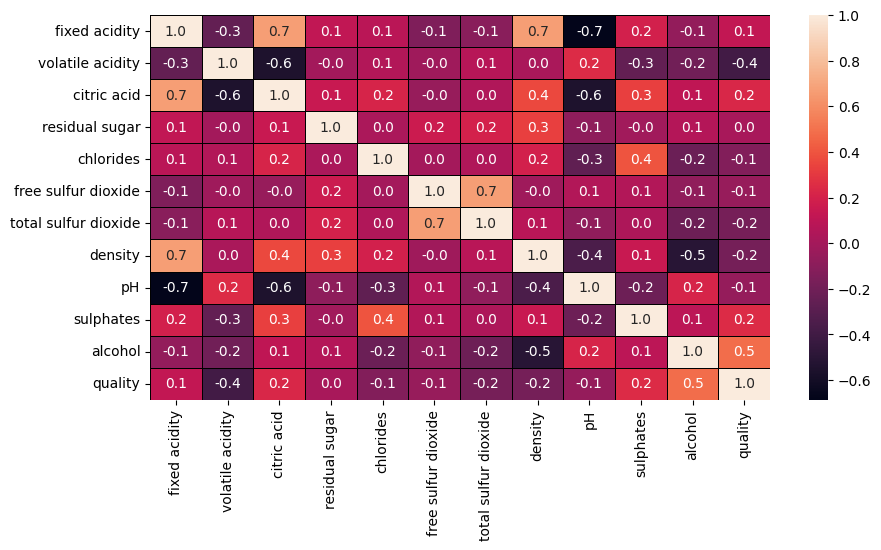

In [23]:
fig,axis=plt.subplots(figsize=(10,5))
sns.heatmap(df.corr(),annot=True,linewidths=0.5,linecolor='black',fmt='.1f',ax=axis)

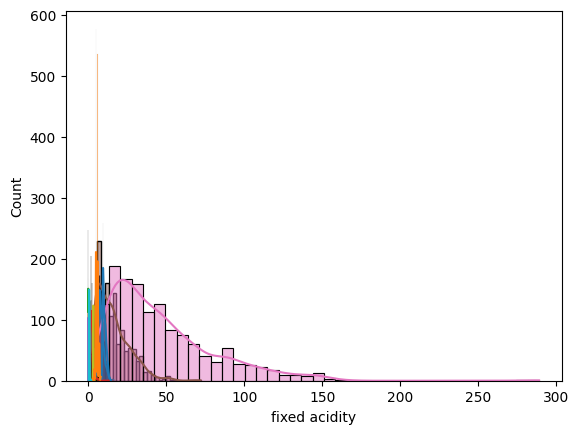

In [24]:
for i in df.columns:
    sns.histplot(df[i],kde=True)

<Axes: xlabel='fixed acidity', ylabel='volatile acidity'>

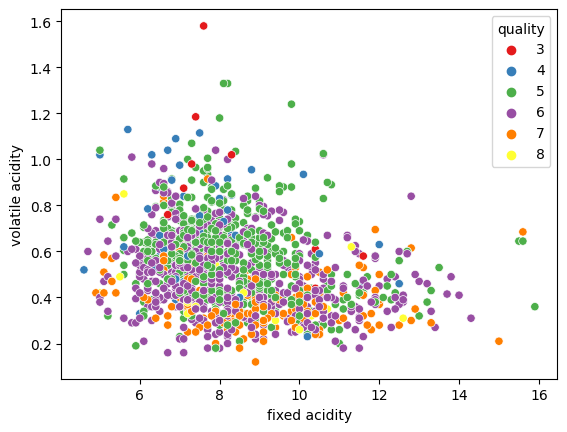

In [31]:
sns.scatterplot(data=df,x='fixed acidity',y='volatile acidity',hue='quality',palette='Set1')

In [35]:
'''Q6. Using the wine quality data set, perform principal component analysis (PCA) to reduce the number of
features. What is the minimum number of principal components required to explain 90% of the variance in
the data?'''
from sklearn.decomposition import PCA
pca=PCA(n_components=0.9)
pca.fit(df)
pca.n_components_


(1359, 12)